In [1]:
#IMPORTING DEPENDENCIES

In [24]:
!pip list

Package                       Version
----------------------------- -----------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakr

In [23]:
!pip install opencv-python matplotlib imageio gdown tensorflow

In [ ]:
#Expo memory growth
#tf.config.list_physical_devices('GPU')

In [ ]:
#physical_devices = tf.config.list_physical_devices('GPU')
#try:
#    tf.config.experimental.set_memory_growth(physical_devices[0], True)
#except:
#    pass

In [ ]:
import gdown

In [ ]:
url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
output = 'data.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

In [2]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

In [3]:
def load_video(path:str) -> List[float]: 

    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))): 
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()
    
    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [4]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [5]:
vocab

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [6]:
#Speech recog Loss func
#Tokenizes 
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


In [7]:
char_to_num.get_vocabulary()

['',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [8]:
num_to_char.get_vocabulary()

['',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [9]:
#testing above function
char_to_num(['h','e','l','l','o'])

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([ 8,  5, 12, 12, 15])>

In [10]:
num_to_char([ 8,  5, 12, 12, 15])

<tf.Tensor: shape=(5,), dtype=string, numpy=array([b'h', b'e', b'l', b'l', b'o'], dtype=object)>

In [127]:
def load_alignments(path:str) -> List[str]: 
    with open(path, 'r') as f: 
        lines = f.readlines() 
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil': 
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]


In [128]:
def load_data(path: str): 
    path = bytes.decode(path.numpy())
    file_name = path.split('/')[-1].split('.')[0]
    # File name splitting for windows
    #file_name = path.split('\\')[-1].split('.')[0]
    video_path = os.path.join('data','s1',f'{file_name}.mpg')
    alignment_path = os.path.join('data','alignments','s1',f'{file_name}.align')
    frames = load_video(video_path) 
    alignments = load_alignments(alignment_path)
    
    return frames, alignments

In [131]:
test_path = './data/s1/bbal6n.mpg'

In [132]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('/')[-1].split('.')[0]

'bbal6n'

In [133]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

In [136]:
frames

<tf.Tensor: shape=(75, 46, 140, 1), dtype=float32, numpy=
array([[[[ 1.4622626 ],
         [ 1.4622626 ],
         [ 1.3832215 ],
         ...,
         [ 0.19760306],
         [ 0.19760306],
         [ 0.07904123]],

        [[ 1.4622626 ],
         [ 1.4622626 ],
         [ 1.3832215 ],
         ...,
         [ 0.19760306],
         [ 0.07904123],
         [ 0.03952061]],

        [[ 1.422742  ],
         [ 1.422742  ],
         [ 1.3832215 ],
         ...,
         [ 0.07904123],
         [ 0.11856184],
         [ 0.11856184]],

        ...,

        [[ 0.9089741 ],
         [ 0.9089741 ],
         [ 0.9089741 ],
         ...,
         [ 9.959194  ],
         [ 9.919674  ],
         [ 9.919674  ]],

        [[ 0.9089741 ],
         [ 0.9089741 ],
         [ 0.9089741 ],
         ...,
         [ 9.880154  ],
         [ 9.880154  ],
         [ 9.880154  ]],

        [[ 0.9089741 ],
         [ 0.9089741 ],
         [ 0.9089741 ],
         ...,
         [ 9.880154  ],
         [ 9.88015

In [137]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 19,  9, 24,
       39, 14, 15, 23])>

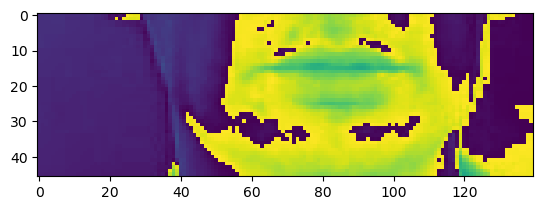

In [138]:
plt.imshow(frames[50])


In [139]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])


<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>

In [140]:
def mappable_function(path:str) ->List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

In [141]:
from matplotlib import pyplot as plt

In [142]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg')
data = data.shuffle(500)
data = data.map(mappable_function)
#data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
#data = data.prefetch(tf.data.AUTOTUNE)
# Added for split 
#train = data.take(450)
#test = data.skip(450)

In [143]:
data.as_numpy_iterator().next()

(array([[[[1.3512332 ],
          [1.3512332 ],
          [1.3512332 ],
          ...,
          [0.11581999],
          [0.07721333],
          [0.07721333]],
 
         [[1.3512332 ],
          [1.3512332 ],
          [1.3512332 ],
          ...,
          [0.11581999],
          [0.07721333],
          [0.07721333]],
 
         [[1.27402   ],
          [1.27402   ],
          [1.27402   ],
          ...,
          [0.11581999],
          [0.11581999],
          [0.11581999]],
 
         ...,
 
         [[0.9265599 ],
          [0.9265599 ],
          [0.8879533 ],
          ...,
          [9.690272  ],
          [9.690272  ],
          [9.690272  ]],
 
         [[0.9265599 ],
          [0.9265599 ],
          [0.8879533 ],
          ...,
          [9.613059  ],
          [9.728879  ],
          [9.651666  ]],
 
         [[0.9265599 ],
          [0.9265599 ],
          [0.8879533 ],
          ...,
          [9.613059  ],
          [9.651666  ],
          [9.574452  ]]],
 
 
        [

In [1]:
!pip install --upgrade jupyterlab-git
!jupyter lab build --dev-build=False --minimize=False


[LabBuildApp] JupyterLab 3.5.3
[LabBuildApp] Building in /Users/deelakagunasinghe/anaconda3/share/jupyter/lab
[LabBuildApp] Building jupyterlab assets (production, not minimized)
Build failed.
Troubleshooting: If the build failed due to an out-of-memory error, you
may be able to fix it by disabling the `dev_build` and/or `minimize` options.

If you are building via the `jupyter lab build` command, you can disable
these options like so:

jupyter lab build --dev-build=False --minimize=False

You can also disable these options for all JupyterLab builds by adding these
lines to a Jupyter config file named `jupyter_config.py`:

c.LabBuildApp.minimize = False
c.LabBuildApp.dev_build = False

If you don't already have a `jupyter_config.py` file, you can create one by
adding a blank file of that name to any of the Jupyter config directories.
The config directories can be listed by running:

jupyter --paths

Explanation:

- `dev-build`: This option controls whether a `dev` or a more streamlined

In [1]:
pip install --upgrade jupyterlab jupyterlab-git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 2.4 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.0/375.0 kB 3.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.7/424.7 kB 3.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 3.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 2.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: tornado
    Found existing installation: tornado 6.1
    Uninstalling tornado-6.1:
      Successfully uninstalled tornado-6.1
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 23.2.0
    Uninstalling pyzmq-23.2.0:
      Successfully uninstalled pyzmq-23.2.0
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter_client 7.3.